In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%pylab inline                 
import control as con
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smp

Populating the interactive namespace from numpy and matplotlib


/home/ipa325/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
K = 75
d = 0.5
T = 10
theta = 10
order = 1
zeta_org = 0.7
a0 = 1
a1 = 2*T*zeta_org
a2 = (T**2) 

In [3]:
tf_1 = con.matlab.tf(K, [a2,a1, a0])
print("Normal Transfer function is:")
print(tf_1)
d_num, d_den = con.pade(theta, order)
tf_delay = con.tf(d_num, d_den)
print("Delay transfer function is")
print(tf_delay)
series = con.series(tf_delay, tf_1)
print("Overall transfer function is")
print(series)

Normal Transfer function is:

        75
------------------
100 s^2 + 14 s + 1

Delay transfer function is

-s + 0.2
--------
s + 0.2

Overall transfer function is

          -75 s + 15
------------------------------
100 s^3 + 34 s^2 + 3.8 s + 0.2



100

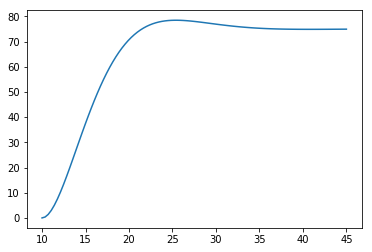

In [4]:
youtd,td=con.matlab.step(tf_1)
youtdd,tdd=con.matlab.step(tf_delay)
plt.plot(np.add(tdd,theta),youtd)
len(youtd)

In [5]:
ptz=[range(0,theta)]
ptz

[range(0, 10)]

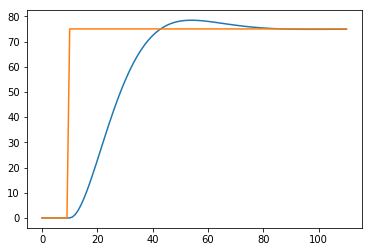

In [6]:
yz=np.zeros(theta)
tz=[0,1,2,3,4,5,6,7,8,9]
youtdz=np.append(yz,youtd)
inp=K*np.ones(len(youtd))
inpz=np.append(yz,inp)
tdz=np.append(ptz,td+theta)
plt.plot(tdz,youtdz)
plt.plot(tdz,inpz)
df_sollt=pd.DataFrame(tdz,columns=['time'])
df_sollv=pd.DataFrame(inpz,columns=['valuex'])
df_soll=pd.concat([df_sollt,df_sollv],axis=1)
df_istt=pd.DataFrame(tdz,columns=['time'])
df_istv=pd.DataFrame(youtdz,columns=['valuey'])
df_ist=pd.concat([df_istt,df_istv],axis=1)

In [7]:
df_soll.to_csv('df_soll.csv')
df_ist.to_csv('df_ist.csv')

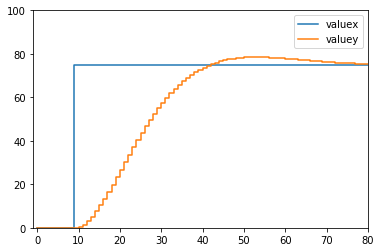

In [8]:
df_ist_soll = pd.concat([df_soll.valuex, df_ist.valuey], axis=1).fillna(method='pad')
df_ist_soll = df_ist_soll.fillna(0)
df_ist_soll.plot(ylim=[-0.01, 100], xlim=[-1, 80], style='-', drawstyle="steps")
plt.savefig('step.png')

In [9]:
import random

In [10]:
tmp = np.add(df_istv.values,np.array(np.random.normal(0,3,110)))
pd.DataFrame(tmp)

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
1,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
2,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
3,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
4,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
5,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
6,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
7,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
8,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878
9,-0.149140,2.915950,4.739253,-4.695250,2.296368,5.406273,7.013505,3.955463,-0.673754,-5.568513,...,-3.111437,0.417704,-0.815615,-4.271924,-3.746495,1.956074,-1.938096,-4.125078,3.805481,-8.539878


In [11]:
temp = []
for i in range(0,110):
    temp.append(tmp[i,random.randint(0,109)])

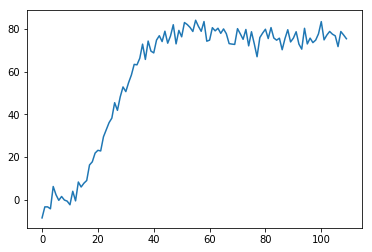

In [12]:
plot(temp)
plt.savefig('noise.png')

In [13]:
youtdz=temp

In [14]:
pd.DataFrame(temp).to_csv('temp_noise.csv')

In [15]:
df_ist_soll.to_csv('df_ist_soll.csv')
#T = df_ist_soll.index.tolist()

In [16]:
youtd_frame=pd.DataFrame(youtdz,columns=['value'])
yss=youtd_frame.tail(n=1)
yss = pd.Series(yss)
yss = pd.to_numeric(yss)
yss=yss[0]

In [17]:
pd.to_numeric(pd.Series(youtd_frame.tail(n=1)))

0    75.461678
dtype: float64

In [18]:
td_frame=pd.DataFrame(tdz,columns=['time'])
df = pd.concat([td_frame,youtd_frame],axis=1)

In [19]:
yss1=yss*0.1
yss3=yss*0.3
yss6=yss*0.6
yss9=yss*0.9

In [20]:
yss9

67.915510158969937

In [21]:
t1 = df.time[df.index == abs(df.value-yss1).sort_values().index[0]].values[0]
t3 = df.time[df.index == abs(df.value-yss3).sort_values().index[0]].values[0]
t6 = df.time[df.index == abs(df.value-yss6).sort_values().index[0]].values[0]
t9 = df.time[df.index ==abs(df.value-yss9).sort_values().head(5).sort_index().index[0]].values[0]

In [22]:
#t1 = df.time[abs(df.value - yss1) <  2.5].values[0] 
#t3 = df.time[abs(df.value - yss3) <  2].values[0]
#t6 = df.time[abs(df.value - yss6) <  2].values[0]
#t9 = df.time[abs(df.value - yss9) <  1].values[0] 

In [23]:
t1,t3,t6,t9

(15.050505050505052,
 21.111111111111114,
 26.161616161616163,
 35.252525252525253)

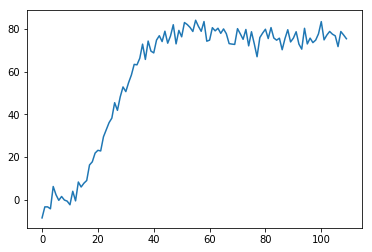

In [24]:
plot(df.value)

In [25]:
df[df.time > 35]

,time,value
35,35.252525,66.295513
36,36.262626,72.924229
37,37.272727,65.763226
38,38.282828,74.360802
39,39.292929,69.662975
40,40.303030,68.816896
41,41.313131,74.830203
42,42.323232,76.882720
43,43.333333,74.143458
44,44.343434,78.986091


In [26]:
def fourpoint(z):
    f1_zeta = 0.451465 + 0.066696*z + 0.013639*z**2
    f3_zeta = 0.800879 + 0.194550*z + 0.101784*z**2
    f6_zeta = 1.202664 + 0.288331*z + 0.530572*z**2
    f9_zeta = 1.941112 - 1.237235*z + 3.182373*z**2
    return f1_zeta,f3_zeta,f6_zeta,f9_zeta

In [27]:
beta = (t9 - t6)/(t3 - t1)

In [28]:
zeta_est_beta = -0.460805 + 0.976315*beta - 0.254517*beta**2 + 0.028115*beta**3

In [29]:
zeta_est_beta

0.52589237499999963

In [30]:
f1_zeta,f3_zeta,f6_zeta,f9_zeta = fourpoint(zeta_est_beta)

In [31]:
def method1(z):
    sum_ti = t1 + t3 + t6 + t9
    sum_fi = f1_zeta + f3_zeta + f6_zeta + f9_zeta
    sum_fi2 = f1_zeta**2 + f3_zeta**2 + f6_zeta**2 + f9_zeta**2
    sum_ti_fi = t1*f1_zeta + t3*f3_zeta + t6*f6_zeta + t9*f9_zeta
    T_est1 = ((4 * sum_ti_fi) - (sum_fi * sum_ti)) / ((4 * sum_fi2) - sum_fi**2)
    theta_est1 = ((sum_ti * sum_fi2) - (sum_fi * sum_ti_fi)) / ((4 * sum_fi2) - sum_fi**2)
    return T_est1,theta_est1

In [32]:
T_est1,theta_est1 = method1(zeta_est_beta)

In [33]:
T_est1,theta_est1

(11.710349417787834, 9.4829464416037865)

In [34]:
peak1=youtd_frame.max()
peak1 = peak1[0]

In [35]:
peak1

84.129382173612456

In [36]:
overshoot = (peak1 - yss)/yss
overshoot

0.11486233084344964

In [37]:
zeta_est_overshoot = numpy.sqrt(numpy.log(overshoot)**2 / (numpy.pi**2 + numpy.log(overshoot)**2))

In [38]:
zeta_est_overshoot

0.56727194222770605

In [39]:
f1_zeta,f3_zeta,f6_zeta,f9_zeta = fourpoint(zeta_est_overshoot)

In [40]:
def method2(z):
    T_est2 = (t9 - t1) / (f9_zeta - f1_zeta) 
    theta_est2 = t1 - T_est2*f1_zeta
    return T_est2,theta_est2

In [41]:
T_est2,theta_est2 = method2(zeta_est_overshoot)

In [42]:
T_est2,theta_est2

(11.41580184488204, 9.414651936595094)

In [43]:
tf_model1 = con.matlab.tf(yss, [T_est1**2,2*zeta_est_beta*T_est1, 1])
d_num1, d_den1 = con.pade(theta_est1, 1)
delay1 = con.matlab.tf(d_num1,d_den1)

Text(0.5,1,'Model using fivepoints')

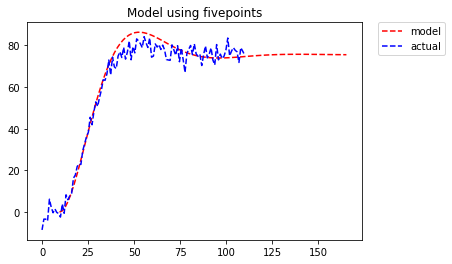

In [44]:
yout1,td1 = con.matlab.step(tf_model1)
plt.plot(np.add(td1,theta_est1),yout1,'--r',label="model")
plt.plot(tdz,youtdz,'--b',label='actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Model using fivepoints")
#plt.savefig('noise5.png')

In [45]:
tf_model2 = con.matlab.tf(yss, [T_est2**2,2*zeta_est_overshoot*T_est2, 1])
d_num2, d_den2 = con.pade(theta_est2, 1)
delay2 = con.matlab.tf(d_num2,d_den2)

Text(0.5,1,'Model using threepoints')

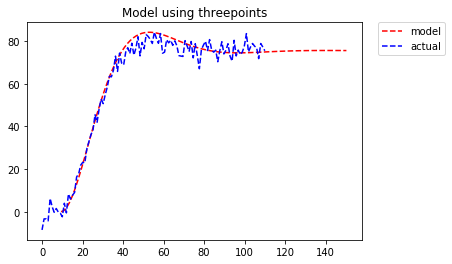

In [46]:
yout2,td2 = con.matlab.step(tf_model2)
plt.plot(np.add(td2,theta_est2),yout2,'--r',label="model")
plt.plot(tdz,youtdz,'--b',label='actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Model using threepoints")
#plt.savefig('noise3.png')

In [47]:
con.matlab.tf2ss(tf_model1*delay1)

A = [[-0.3007216  -0.02623501 -0.00153797]
 [ 1.          0.          0.        ]
 [ 0.          1.          0.        ]]

B = [[ 1.]
 [ 0.]
 [ 0.]]

C = [[ 0.         -0.55028383  0.11605756]]

D = [[ 0.]]

In [48]:
con.matlab.tf2ss(tf_model2*delay2)

A = [[-0.31181847 -0.02878593 -0.00163009]
 [ 1.          0.          0.        ]
 [ 0.          1.          0.        ]]

B = [[ 1.]
 [ 0.]
 [ 0.]]

C = [[ 0.         -0.57904673  0.12300969]]

D = [[ 0.]]